In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../measurement_data/rf_measurements.csv")

### Return Loss ($RL$)

Return Loss is a measure of the power reflected back toward the source due to an impedance mismatch in a transmission line or optical fiber. It is the ratio of incident power to reflected power, typically expressed in decibels (dB). In RF engineering, it is derived from the reflection coefficient, $S_{11}$.

## 1. Magnitude of $S_{11}$
Given the real and imaginary components from the dataset ($S_{11} = \text{Re} + j\text{Im}$), the magnitude $|S_{11}|$ is calculated as:

\begin{equation}
|S_{11}| = \sqrt{S_{11,real}^2 + S_{11,imag}^2}
\end{equation}

## 2. Return Loss Calculation (dB)
Return Loss is defined as the negative magnitude of the reflection coefficient in decibels:

\begin{equation}
RL(\text{dB}) = -20 \log_{10}(|S_{11}|)
\end{equation}

Note: In practice, while $S_{11}$ is mathematically negative, Return Loss is often expressed as a positive scalar representing the magnitude of that "loss."} *

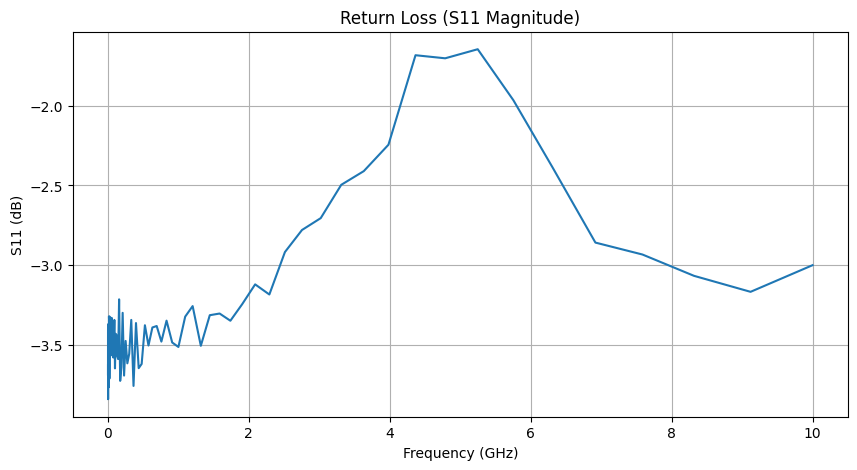

In [16]:
### Lets plot the S11 magnitude in dB vs frequency in GHz

# 1. Extract frequency and calculate magnitude
frequencies = df["frequency_Hz"].values
S11_mag = np.sqrt(df["S11_real"]**2 + df["S11_imag"]**2)

# 2. Convert to decibels (dB)
S11_mag_db = 20 * np.log10(S11_mag)

# 3. Plotting (divide by 1e9 to convert Hz to GHz for the x-axis)
plt.figure(figsize=(10, 5))
plt.plot(frequencies / 1e9, S11_mag_db) 

plt.title("Return Loss (S11 Magnitude)")
plt.ylabel("S11 (dB)")
plt.xlabel("Frequency (GHz)")
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (2859674061.py, line 3)